# Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler 

import warnings
warnings.filterwarnings('ignore')

# Import Data

In [2]:
df = pd.read_csv('bank-full.csv', sep = ';')
df.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no


# Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Check the Duplicate

In [4]:
print(df.duplicated().value_counts())

False    45211
dtype: int64


# Check the Missing Value

In [5]:
df.isnull().values.any()

False

# Descriptive Overview

In [6]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.94,10.62,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.27,3044.77,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.81,8.32,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.16,257.53,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.76,3.10,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.20,100.13,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.58,2.30,0.0,0.0,0.0,0.0,275.0


# Target value Modification

In [7]:
df.rename(columns = {'y':'deposit'}, inplace = True)

In [8]:
df['deposit'] = df['deposit'].map( {'yes':1 ,'no':0}) 

df['deposit'].value_counts()/len(df)

0    0.883015
1    0.116985
Name: deposit, dtype: float64

In [9]:
df.groupby('deposit').mean()

,age,balance,day,duration,campaign,pdays,previous
deposit,,,,,,,
0,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
1,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


**Observations**:


- Average age and balance are **higher** for customers who have a term deposit.




- Day of the week does **not seem to have an impact** on the target variable and may need to be dropped in future analysis.




- Average **call duration** is higher for customers who have a term deposit.




- Customers who have a term deposit were **contacted fewer times** during the campaign.




- The number of days since the customer was last contacted (pdays) is **lower** for customers who have a term deposit, which makes sense since they are more likely to remember the previous contact.



- The **number of previous** contacts is **higher** for customers who have a term deposit.

# Target value Distribution

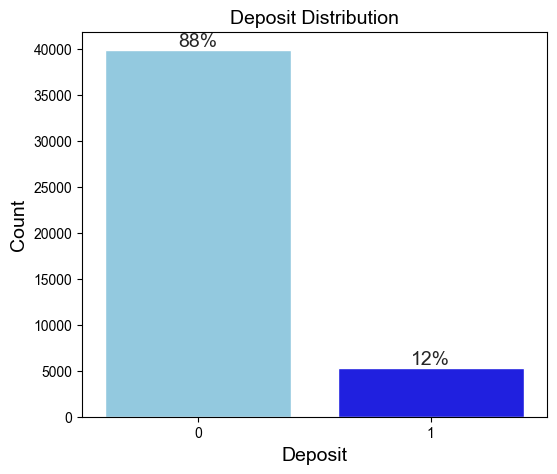

In [10]:
fig, ax = plt.subplots(figsize=(6, 5))#size
sns.set_style('whitegrid')

sns.countplot(x=df['deposit'], ax=ax,palette={0:'skyblue', 1:'blue'})

abs_vals = df['deposit'].value_counts()
rel_vals = df['deposit'].value_counts(normalize=True) * 100
labels = [f'{p[1]:.0f}%' for p in zip(abs_vals, rel_vals)]

ax.bar_label(container=ax.containers[0], labels=labels, fontsize=14)
ax.set_title('Deposit Distribution', fontsize=14)
plt.xlabel('Deposit', fontsize=14)
plt.ylabel('Count', fontsize=14)

#plt.tight_layout()
plt.savefig('target_value.png',bbox_inches='tight')

**Observation**

- The number of customers who have subscribed deposits is 5289 (12%)  


- The number of customers who do not subscribe deposits is 39922 (88%)


- The data is imbalanced and skewed(lead to false negatives)

# Categorical Features Overview

## Deposit by Job,Marital and Education

Text(0.5, 1.0, 'Education Distribution')

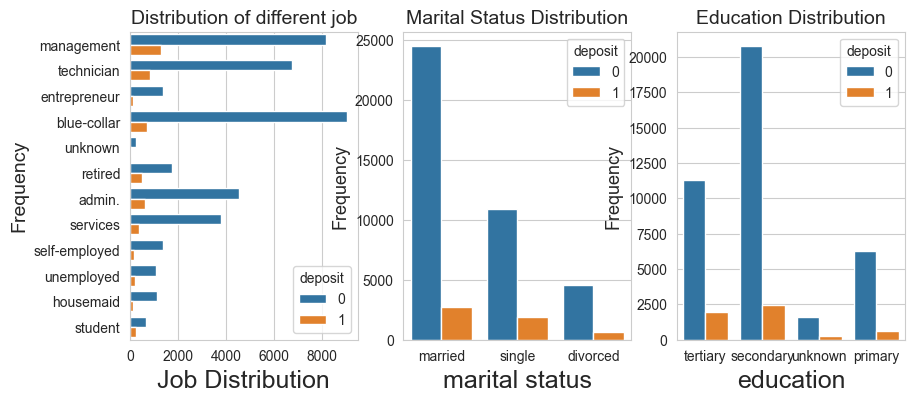

In [11]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize = (10, 4))

ax = sns.countplot(y='job', hue='deposit', data=df, ax=ax1)
ax.set_xlabel('Job Distribution', fontsize=18)
ax.set_ylabel('Frequency', fontsize = 14)
ax.set_title('Distribution of different job', fontsize = 14)

ax = sns.countplot(x='marital', hue='deposit', data=df, ax=ax2)
ax.set_xlabel('marital status', fontsize=18)
ax.set_ylabel('Frequency', fontsize = 13)
ax.set_title('Marital Status Distribution', fontsize = 14)

ax = sns.countplot(x='education', hue='deposit', data=df, ax=ax3)
ax.set_xlabel('education',fontsize = 18)
ax.set_ylabel('Frequency', fontsize = 13)
ax.set_title('Education Distribution', fontsize = 14)

## Deposit by Default,Housing and Loan

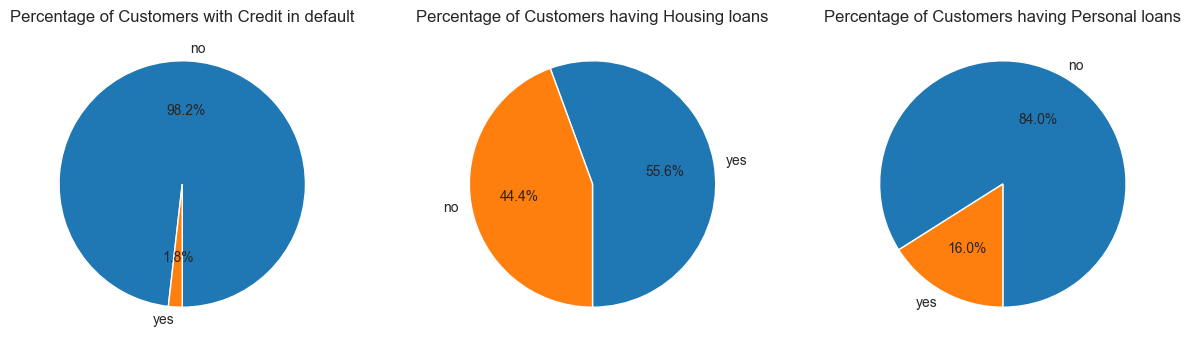

In [12]:
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
labels =df['default'].value_counts().index
sizes = df['default'].value_counts()
plt.pie(sizes,labels=labels,autopct='%1.1f%%', startangle=270)
plt.title('Percentage of Customers with Credit in default',size = 12)

plt.subplot(1,3,2)
labels =df['housing'].value_counts().index
sizes = df['housing'].value_counts()
plt.pie(sizes,labels=labels,autopct='%1.1f%%', startangle=270)
plt.title('Percentage of Customers having Housing loans',size = 12)

plt.subplot(1,3,3)
labels =df['loan'].value_counts().index
sizes = df['loan'].value_counts()
plt.pie(sizes,labels=labels,autopct='%1.1f%%', startangle=270)
plt.title('Percentage of Customers having Personal loans',size = 12)
plt.show()

## Deposit by Contact, Month,Poutcome

Text(0.5, 1.0, ' outcome of the previous marketing campaign')

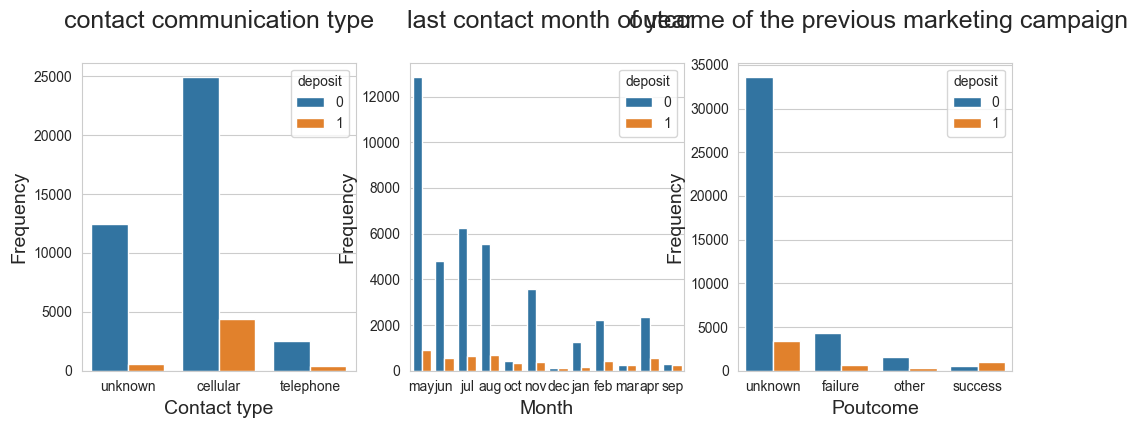

In [13]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize = (12, 4))

ax = sns.countplot(x='contact', hue='deposit', data=df, ax=ax1)
ax.set_xlabel('Contact type', fontsize=14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.set_title('contact communication type', fontsize = 18,pad=25)

ax = sns.countplot(x='month', hue='deposit', data=df, ax=ax2)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.set_title(' last contact month of year', fontsize = 18,pad=25)

ax = sns.countplot(x='poutcome', hue='deposit', data=df, ax=ax3)
ax.set_xlabel('Poutcome',fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.set_title(' outcome of the previous marketing campaign', fontsize = 18,pad=25)

## Categorical Features Overview in a for loop

In [14]:
#categorical_features = df.select_dtypes(include='object').drop('deposit').columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()

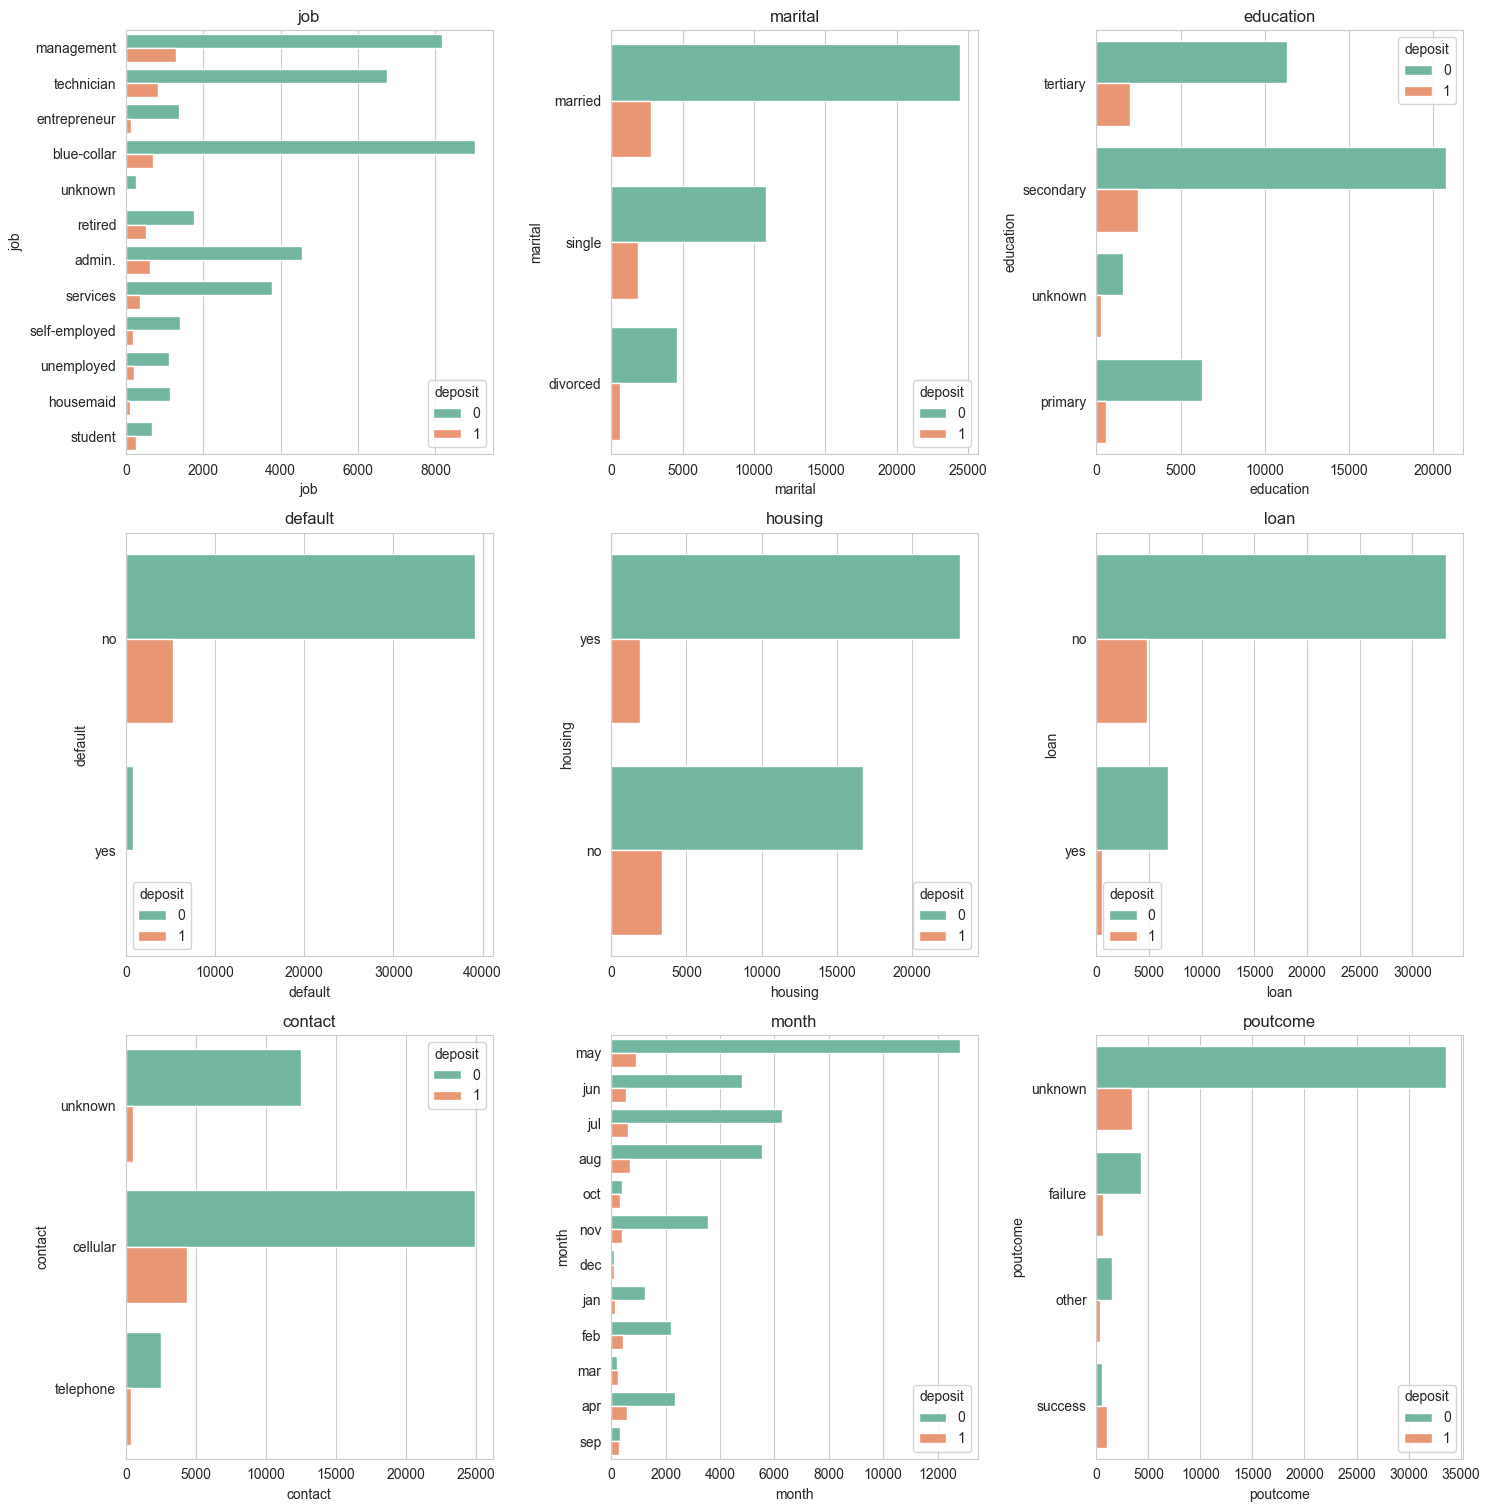

In [15]:
#categorical features
plt.figure(figsize=(15,60))
pos =1
for cat_feature in categorical_features:
    ax = plt.subplot(12,3,pos)
    sns.countplot(y=cat_feature, data=df ,hue='deposit',palette = 'Set2')
    plt.xlabel(cat_feature)
    plt.title(cat_feature)
    pos+=1
plt.tight_layout()

# Univariate Analysis of Categorical Features

- We will look into the Count Plots of each feature to find out the class distribution for each feature



- First define two functions, one to plot the count plots and other foe calculating the percentage of subscribtion 

## Function for plotting each feature

In [16]:
# Define a function to create a bar label on categorical plots

def label(data,feature,x,y):
    """
    Description: This function would plot each categorical feature and their labels respectively.
    
    data : dataframe
    feature : categorical feature
    x,y: size of plot 
    
    output: plot a countplot
    """
    plt.figure(figsize=[x,y])
    sns.set_style('whitegrid')
    fig_deposit = sns.countplot(x=feature, hue='deposit', data = data, palette='pastel')
    fig_deposit.bar_label(fig_deposit.containers[0])
    fig_deposit.bar_label(fig_deposit.containers[1])

## Function to calculate the percentage of deposit (subscribtion)

In [17]:
# Define a function to calculate the ratio in respect of deposit

def Ratio(feature):
    """
    This function would calculate the percentage of getting deposit .i.e., sum of deposit divided by count.
    
    return: dep as a dictionary 
    """
    dep = df.groupby([feature])['deposit'].agg(['count', 'sum', 'mean']) 
    dep = dep.rename(columns = {'count':'Nr of Client','sum':'DeptSum', 'mean':'Ratio'}).sort_values(by='Ratio',ascending=False)
    return dep

- Analysis each categorical feature individually

## Job 

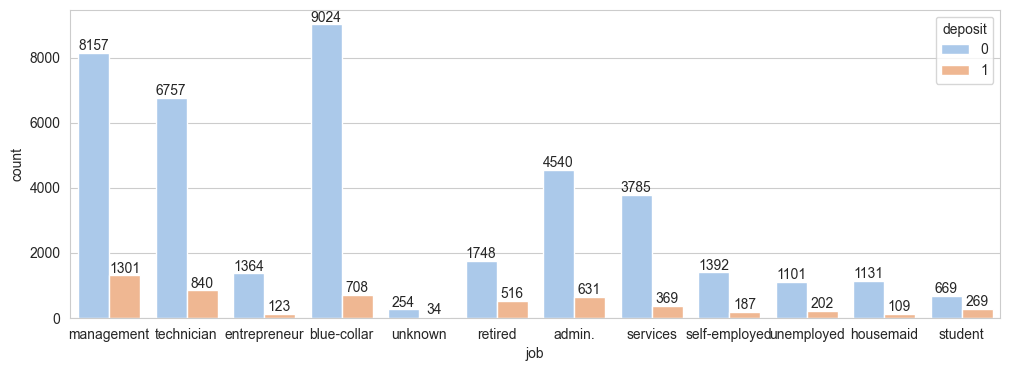

In [18]:
label(df,'job',12,4)

In [19]:
Ratio('job')

,Nr of Client,DeptSum,Ratio
job,,,
student,938,269,0.286780
retired,2264,516,0.227915
unemployed,1303,202,0.155027
management,9458,1301,0.137556
admin.,5171,631,0.122027
self-employed,1579,187,0.118429
unknown,288,34,0.118056
technician,7597,840,0.110570
services,4154,369,0.088830


- students and retired customers have higher ratio rates among other jobs.

## Marital

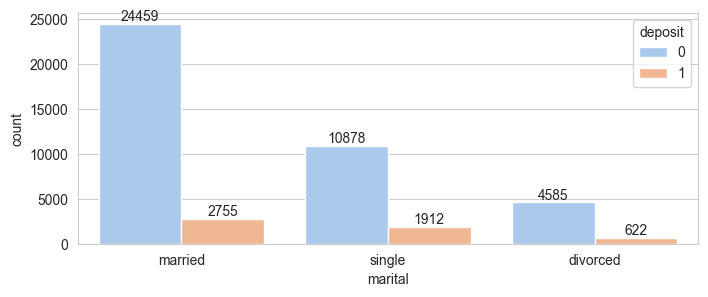

In [20]:
label(df,'marital',8,3)

In [21]:
Ratio('marital')

,Nr of Client,DeptSum,Ratio
marital,,,
single,12790,1912,0.149492
divorced,5207,622,0.119455
married,27214,2755,0.101235


- Even though the number of married customers is more, the single customer is close to getting the term deposit. 

## Education

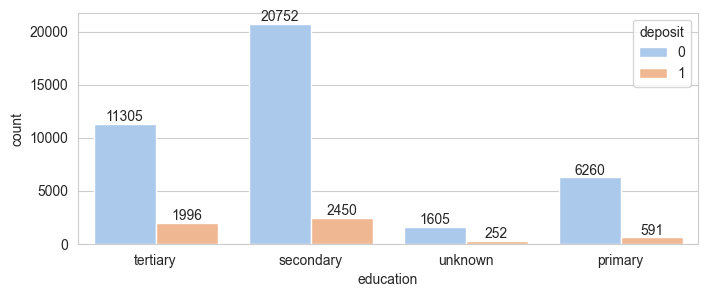

In [22]:
label(df,'education',8,3)

In [23]:
Ratio('education')

,Nr of Client,DeptSum,Ratio
education,,,
tertiary,13301,1996,0.150064
unknown,1857,252,0.135703
secondary,23202,2450,0.105594
primary,6851,591,0.086265


- Clients with a secondary education level form the majority, but customers with tertiary education levels have the highest percentage (15%) of term deposits.



- The trend for term deposits decreases with lower education levels, indicating that higher education is associated with a higher likelihood of subscribing.

## Default

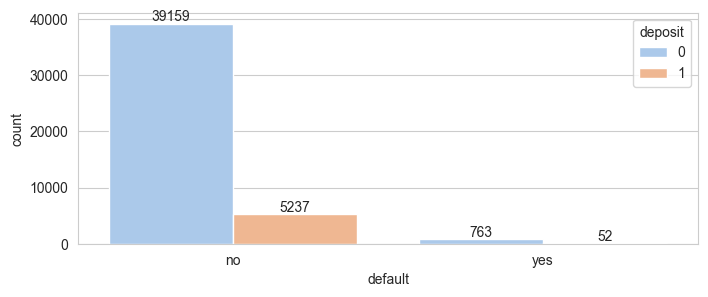

In [24]:
label(df,'default',8,3)

In [25]:
Ratio('default')

,Nr of Client,DeptSum,Ratio
default,,,
no,44396,5237,0.117961
yes,815,52,0.063804


## Housing

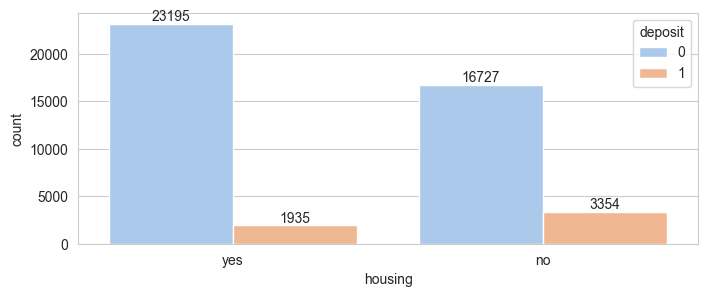

In [26]:
label(df,'housing',8,3)

In [27]:
Ratio('housing')

,Nr of Client,DeptSum,Ratio
housing,,,
no,20081,3354,0.167024
yes,25130,1935,0.077000


## Loan

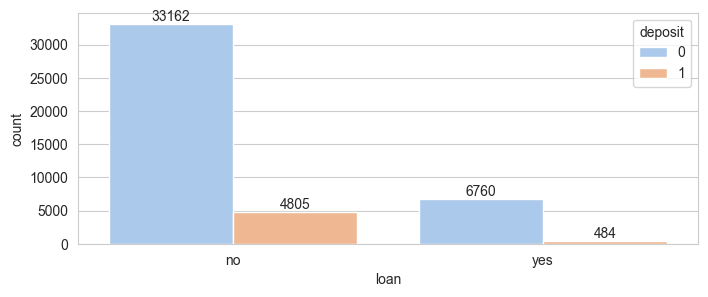

In [28]:
label(df,'loan',8,3)

In [29]:
Ratio('loan')

,Nr of Client,DeptSum,Ratio
loan,,,
no,37967,4805,0.126557
yes,7244,484,0.066814


- Clients with no credit defaults or loans (housing or personal) are twice as likely to subscribe to a deposit compared to those with defaults or loans.

## Contact

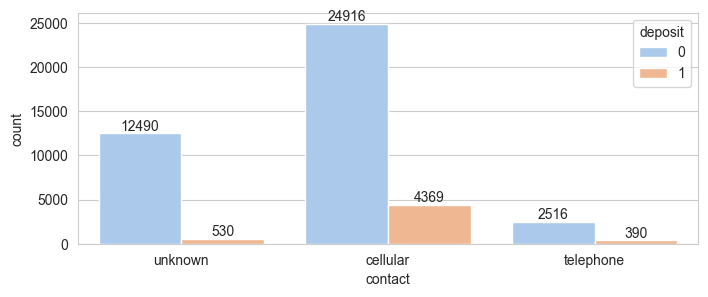

In [30]:
label(df,'contact',8,3)

In [31]:
Ratio('contact')

,Nr of Client,DeptSum,Ratio
contact,,,
cellular,29285,4369,0.149189
telephone,2906,390,0.134205
unknown,13020,530,0.040707


- Contacting clients by phone or cell phone does not have a significant impact on deposit rates. However, clients contacted by unknown sources are less likely to deposit, with only a 4% deposit rate. Further investigation is needed to clarify what "unknown" means in this context.

## Month

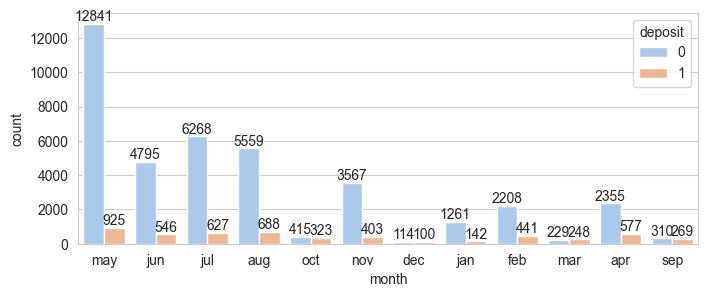

In [32]:
label(df,'month',8,3)

In [33]:
Ratio('month').T

month,mar,dec,sep,oct,apr,feb,aug,jun,nov,jan,jul,may
Nr of Client,477.000000,214.00000,579.000000,738.000000,2932.000000,2649.000000,6247.000000,5341.000000,3970.000000,1403.000000,6895.000000,13766.000000
DeptSum,248.000000,100.00000,269.000000,323.000000,577.000000,441.000000,688.000000,546.000000,403.000000,142.000000,627.000000,925.000000
Ratio,0.519916,0.46729,0.464594,0.437669,0.196794,0.166478,0.110133,0.102228,0.101511,0.101212,0.090935,0.067195


- Although the number of clients was high in **May** in compare with other months but the **deposit subscribtion** was the **lowest**

## poutcome

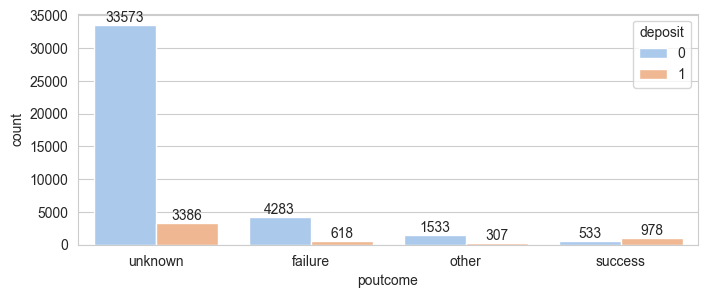

In [34]:
label(df,'poutcome',8,3)

In [35]:
Ratio('poutcome')

,Nr of Client,DeptSum,Ratio
poutcome,,,
success,1511,978,0.647253
other,1840,307,0.166848
failure,4901,618,0.126097
unknown,36959,3386,0.091615


- if the outcome of the previous marketing campaign is successful we can see a higher deposit rate


- Customers with unknown poutcome  are most likely to open term deposit.


- Although the meaning of unknown is not defined in the dataset but as the value is high, we will keep it  as it might show some patterns


- we will segment the poutcome to two category: Success and not success



# Bivariate Analysis of Categorical Features

- In this Section, we focus on customers charachteristic, who say **'Yes'** to the Subscription


- How professions have influenced whether a person would subscribe?


- How type of contact can play a role in getting a term deposit?


- Does any particular month(s) can have an impact on subscribing a deposit?


- Does the previous campaign can lead to more subscribtion or not?


- How different Marital Status and different level of education can impact on subscribing  aterm deposit? 


- **job**:  **Students & Retired** are more likely to subscribe a term deposit respectively.**blueCollar** are the lowest in subcribing the term deposit.

In [36]:
df1 = df.groupby(['job','deposit']).count().reset_index()
df1.loc[:,'percentage'] = list(df1.groupby(['job'])['age'].apply(lambda x: round(x*100/x.sum())))
df1.loc[:,'percentage'] 
df1 = df1[df1.deposit==1]
#df1.percentage

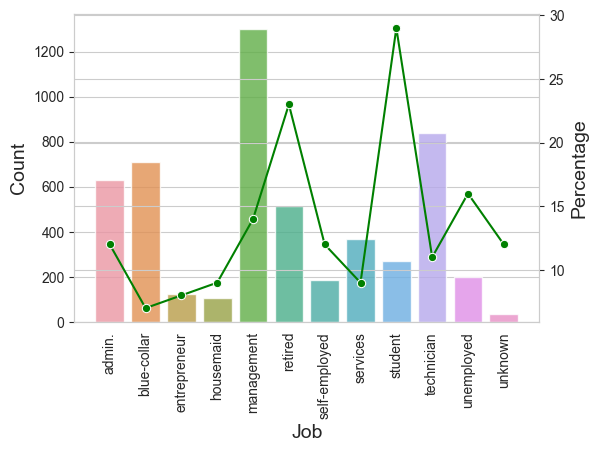

In [37]:
fig, ax1 = plt.subplots(figsize=(6,4))

#sns.countplot(data = df, x='job', alpha=0.8, ax=ax1)
sns.barplot(data = df1, x='job', y= 'age', alpha=0.8, ax=ax1)

plt.xlabel('Job', fontsize=14)
plt.ylabel('Count', fontsize=14)

for label in ax1.get_xticklabels():
    label.set_rotation(90)
ax2 = ax1.twinx()
sns.lineplot(data =df1, x='job', y='percentage', marker='o', sort = True,ax=ax2,color='green')
plt.ylabel('Percentage', fontsize=14)
plt.savefig('profession.png',bbox_inches='tight')

- **Contact**: Contacting through **Cellular** leads to subscribe abit  more deposit in compare to telephone but not dramatically different.



- On the other hand, customers contacted by unknown contacts are more likely to **not** deposit; only 4% of them deposited. 
  the unknown does not define in the dataset.

In [38]:
df2 = df.groupby(['contact','deposit']).count().reset_index()
df2.loc[:,'percentage'] = list(df2.groupby(['contact'])['age'].apply(lambda x: round(x*100/x.sum())))
df2 = df2[df2.deposit==1]

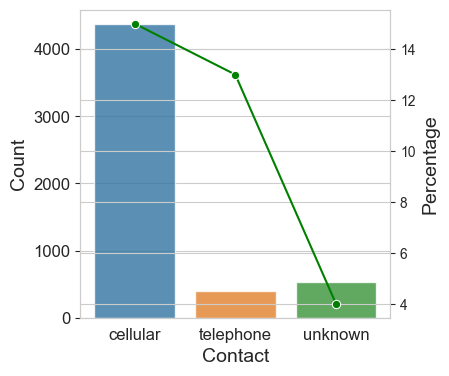

In [39]:
fig, ax1 = plt.subplots(figsize=(4,4))

ax1.tick_params(axis='both', which='major', labelsize=12)

sns.barplot(data = df2, x='contact',y='age' ,alpha=0.8, ax=ax1)

plt.xlabel('Contact', fontsize=14)
plt.ylabel('Count', fontsize=14)

ax2 = ax1.twinx()
sns.lineplot(data =df2, x='contact', y='percentage', marker='o', sort = True,ax=ax2,color='green')

plt.ylabel('Percentage', fontsize=14)
plt.savefig('contact.png',bbox_inches='tight')

 - **Month**: **March** & **December** have the **highest** ratio of subscribing a term deposit and **May** is the **lowest** month, unlike the number of customers are much more in May but the subscribtion is the lowest.

In [40]:
df3 = df.groupby(['month','deposit']).count().reset_index()
df3.loc[:,'percentage'] = list(df3.groupby(['month'])['age'].apply(lambda x: round(x*100/x.sum())))
df3 = df3[df3.deposit==1]

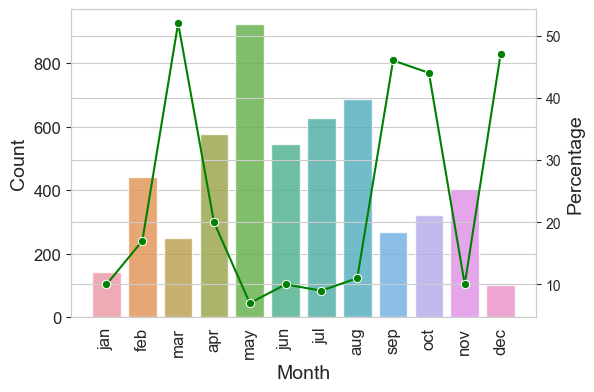

In [41]:
fig, ax1 = plt.subplots(figsize=(6,4))

ax1.tick_params(axis='both', which='major', labelsize=12)


sns.barplot(data = df3.reindex([9,7,15,1,17,13,11,3,23,21,19,5]), x='month',y='age', ax=ax1,alpha=0.8)

plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)

for label in ax1.get_xticklabels():
    label.set_rotation(90)

ax2 = ax1.twinx()
sns.lineplot(data =df3.reindex([9,7,15,1,17,13,11,3,23,21,19,5]), x='month', y='percentage', marker='o', sort = True,ax=ax2, color='green')

#plt.title('Subscription vs. Contact Rate by Month')
#plt.ylabel('Subscription and Contact Rate',fontsize=14)
plt.ylabel('Percentage',fontsize=14)

plt.savefig('month.png',bbox_inches='tight')
#plt.xlabel('Month')

- The barplot displays the bank's contact rate in each month 


- The line chart displays the subscription rate in each month.


- One way to evaluate the effectiveness of the bank's marketing plan is to see whether these two chart have a similar trend over the same time horizon.


- The **successful previous campaign**  lead to a higher percentage of clients who accepts the subscription for a term deposit.

In [42]:
df4 = df.groupby(['poutcome','deposit']).count().reset_index()
df4.loc[:,'percentage'] = list(df4.groupby(['poutcome'])['age'].apply(lambda x: round(x*100/x.sum())))
df4 = df4[df4.deposit==1]

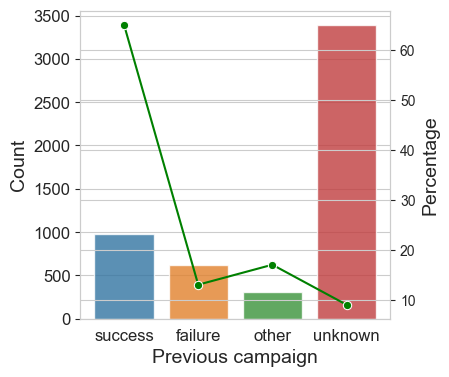

In [43]:
fig, ax1=plt.subplots(figsize=(4,4))

ax1.tick_params(axis='both', which='major', labelsize=12)

sns.barplot(data=df4.reindex([5,1,3,7]), x='poutcome',y='age',alpha=0.8, ax=ax1)

plt.xlabel('Previous campaign', fontsize=14)
plt.ylabel('Count', fontsize=14)

ax2 =ax1.twinx()
sns.lineplot(data=df4.reindex([5,1,3,7]),x='poutcome',y='percentage', marker='o', sort = True,ax=ax2,color='green')

plt.ylabel('Percentage', fontsize=14)
plt.savefig('preCamp.png',bbox_inches='tight')

- **Single** customers are 4% more likley to subsribe the term deposit.

In [44]:
df5 = df.groupby(['marital','deposit']).count().reset_index()
df5.loc[:,'percentage'] = list(df5.groupby(['marital'])['age'].apply(lambda x: round(x*100/x.sum())))
df5 = df5[df5.deposit==1]

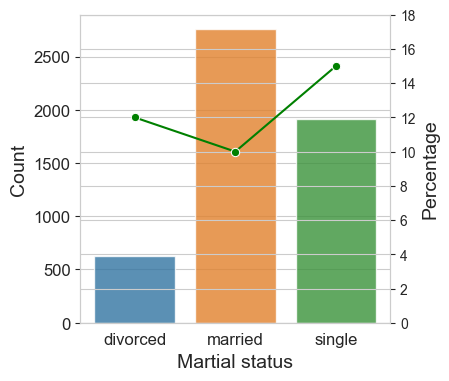

In [45]:
fig, ax1=plt.subplots(figsize=(4,4))

ax1.tick_params(axis='both', which='major', labelsize=12)

sns.barplot(data=df5, x='marital',y='age',alpha=0.8, ax=ax1)

plt.xlabel('Martial status', fontsize=14)
plt.ylabel('Count', fontsize=14)

ax2 =ax1.twinx()
ax2.set_ylim(0, 18)
sns.lineplot(data=df5,x='marital',y='percentage', marker='o', sort = True,ax=ax2,color='green')

plt.ylabel('Percentage', fontsize=14)
plt.savefig('maritalStat.png',bbox_inches='tight')

- Customers with **Tertiary** level of education are two times more probable to get the term deposit.

In [46]:
df6 = df.groupby(['education','deposit']).count().reset_index()
df6.loc[:,'percentage'] = list(df6.groupby(['education'])['age'].apply(lambda x: round(x*100/x.sum())))
df6 = df6[df6.deposit==1]

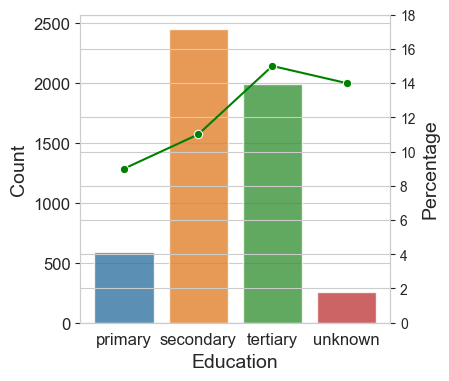

In [47]:
fig, ax1=plt.subplots(figsize=(4,4))

ax1.tick_params(axis='both', which='major', labelsize=12)

sns.barplot(data=df6, x='education',y='age',alpha=0.8, ax=ax1)

plt.xlabel('Education', fontsize=14)
plt.ylabel('Count', fontsize=14)

ax2 =ax1.twinx()
ax2.set_ylim(0, 18)
sns.lineplot(data=df6,x='education',y='percentage', marker='o', sort = True,ax=ax2,color='green')

plt.ylabel('Percentage', fontsize=14)
plt.savefig('education.png',bbox_inches='tight')

#  Numerical Features Overview

# Univariate Analysis of Numerical Features



In [48]:
Numeric_data = df.select_dtypes(include='number').columns.tolist()
#df[Numeric_data]

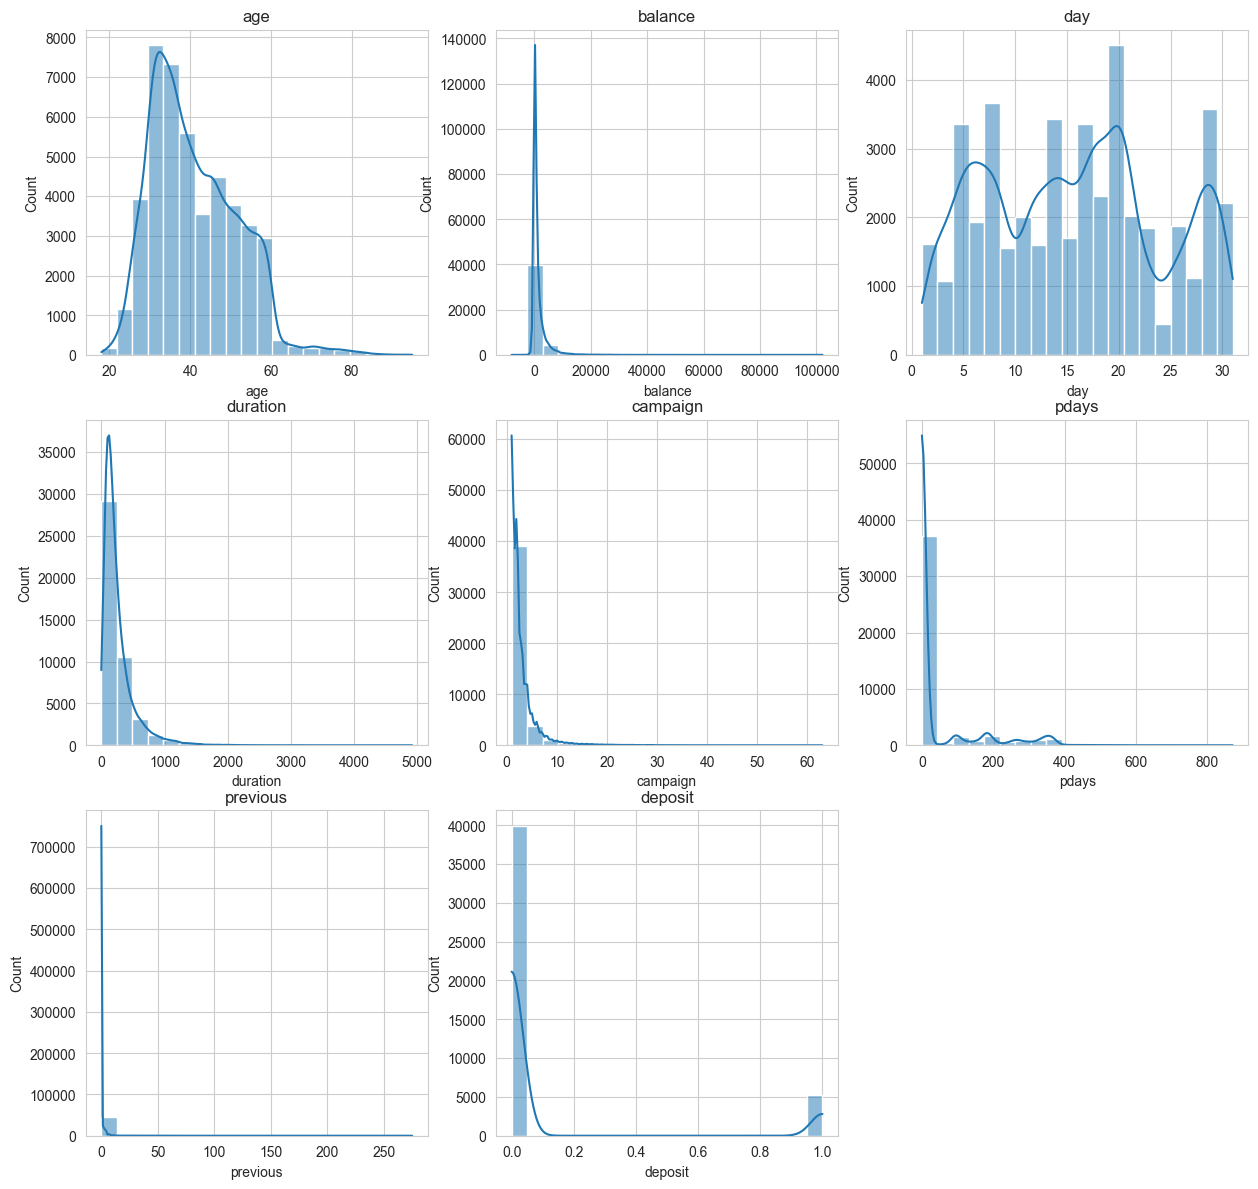

In [49]:
#Numerical features overview 2
plt.figure(figsize=(15,60))

plotnum =1
for i in Numeric_data:
    ax = plt.subplot(12,3,plotnum)
    #sns.histplot(data=df,x=i,kde=True, bins=20)
    sns.histplot(df[i],kde=True, bins=20)
    plt.xlabel(i)
    plt.title(i)
    plotnum+=1
plt.show()

- Most of the numerical features (Balance, duration, compaign, pdays and previous) have **right skewed** and have some **outliers**  which need to be removed in the next part. Age, Days almost normally distributed.


- Most of the customers lie between age of 20 and 60


- Numeric features have **different scales**, need to be scale values before building ML model.

#  Bivariate Analysis of Numerical Features

- In this section we look at the impact of some Bank customer data like age, balance, ... on subsribing a term deposit.



- Here we check the relation of each numeric variable with other variable and the target value

# Age

### Age Distribution in Getting Deposit Vs Not Getting Deposit

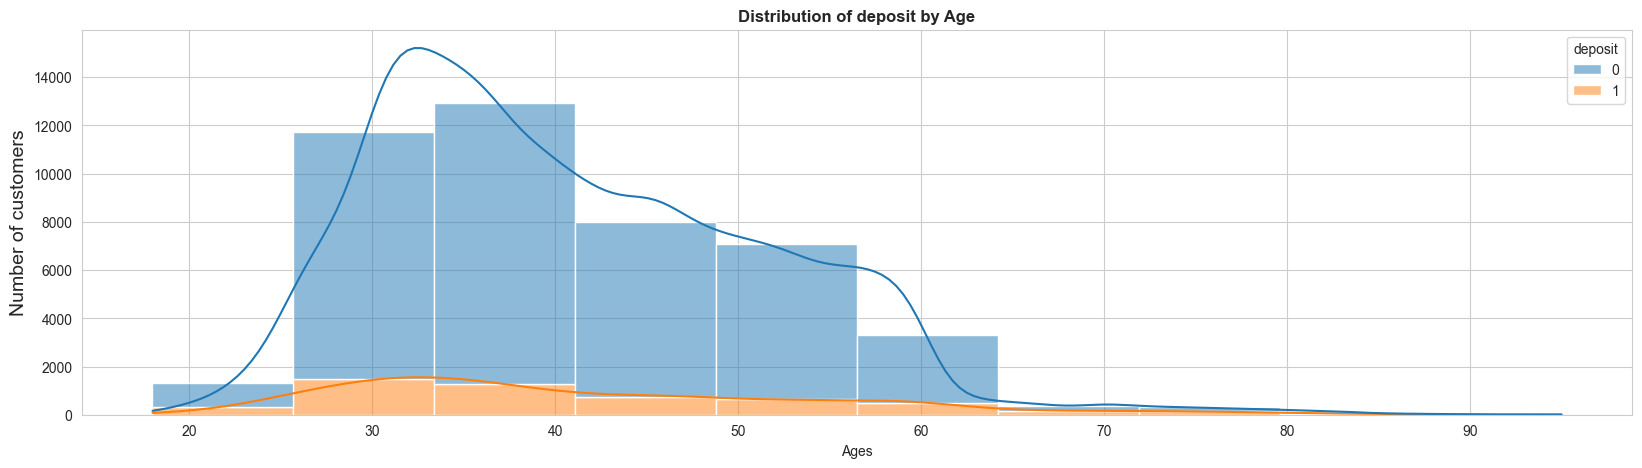

In [50]:
fig = plt.figure(figsize= (20,5))
dep_by_age = sns.histplot(data = df, x = 'age', hue = 'deposit',multiple='stack', bins=10,kde=True,element='bars')

dep_by_age.set_ylabel('Number of customers',fontsize=14)
dep_by_age.set_xlabel('Ages')
dep_by_age.set_title('Distribution of deposit by Age',weight='bold')
plt.show()

## binning the age to get more insight 

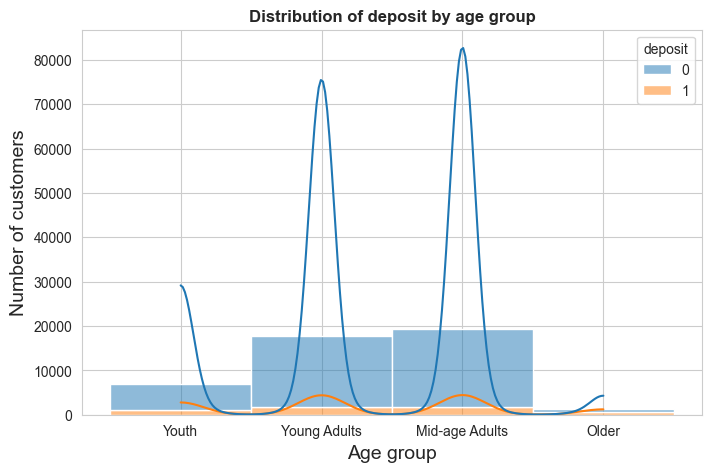

In [51]:
# Create age bins
bins = [18, 30, 40, 60, 95]
labels = ['Youth', 'Young Adults', 'Mid-age Adults', 'Older']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)

# Create plot
fig = plt.figure(figsize=(8, 5))
dep_by_age = sns.histplot(data=df, x='age_group', hue='deposit', multiple='stack', bins=len(labels), kde=True, element='bars')

# Set labels and title
dep_by_age.set_ylabel('Number of customers', fontsize=14)
dep_by_age.set_xlabel('Age group', fontsize=14)
dep_by_age.set_title('Distribution of deposit by age group', weight='bold')

# Show plot
#plt.show()
plt.savefig('age.png',bbox_inches='tight')

**Observation**:


- The histogram plot shows the distribution of deposits by age group. The bars represent the number of customers in each age group who made a deposit (in orange) and did not make a deposit (in blue).


- From the plot, it appears that the majority of customers who made a deposit are Youth or older, but the bank more contaced to  the young adult and midle age adults.



- Overall, the plot suggests that age is a significant factor in determining whether a customer will make a deposit, with older customers more likely to make a deposit compared to younger groups.


In [52]:
Ratio('age_group')


,Nr of Client,DeptSum,Ratio
age_group,,,
Older,1188,502,0.422559
Youth,7030,1145,0.162873
Young Adults,17687,1812,0.102448
Mid-age Adults,19306,1830,0.094789


**Observation**

- target the **youngest** and the **oldest** instead of the middle-aged


-  All above graphs indicate that customers with a age of 60+ have the highest subscription rate. around 42%


-  About 17% of the subscriptions came from the clients aged between 18 to 30.


- Most client are Young and Middle-Aged People and they have not so high deposit percentages. 11% and 9% respectively.


- Term deposits, as the least risky investment tool, are more preferable to the eldest.


- Results show that the bank focused its marketing efforts on the **middle-aged group**, which returned **lower subscription rates** than the younger and older groups. Thus, to make the marketing campaign more effective, the bank should target younger and older clients in the future.

## Distribution of age by job

Text(0.5, 1.0, 'Jobs by Age')

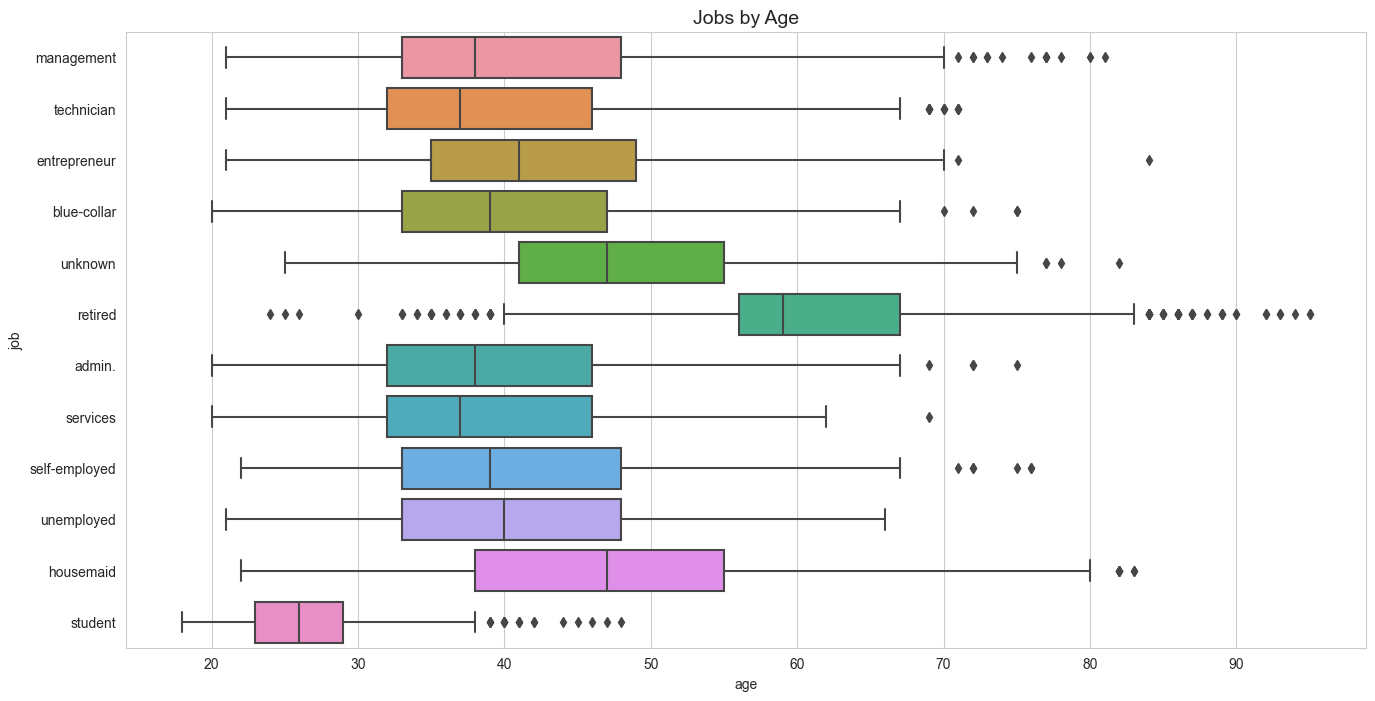

In [53]:
plt.figure(figsize=(16,8))
sns.set_style('whitegrid')
ax= sns.boxplot(x='age',y='job',data=df)
ax.set_title('Jobs by Age', fontsize = 14)

- All the job are almost around 35-55
- students between 25-30
- Retired are above 55

# Balance

# Distribution of age and balance

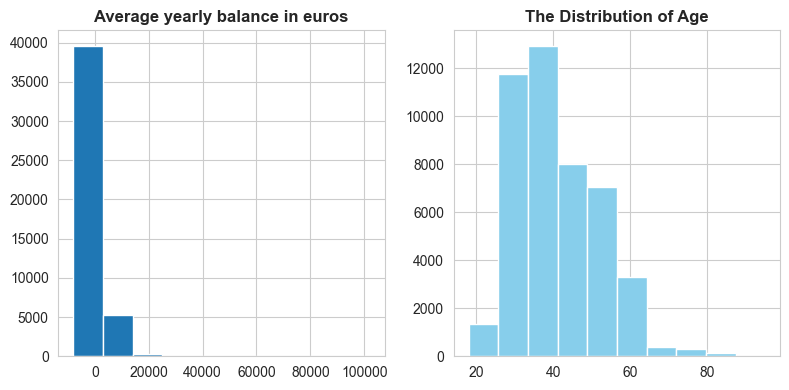

In [54]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize = (8, 4))

ax1.hist(df['balance'])
ax1.set_title('Average yearly balance in euros',weight='bold')

ax2.hist(df['age'], color = 'skyblue')
ax2.set_title('The Distribution of Age',weight='bold')

plt.tight_layout() 
plt.show()

**The distribution of balance** :

- The average yearly balance of customers given is diverse and quite low, which is mostly around €1400 per year.


- The distribution of balance has a **huge standard deviation** relative to the mean, suggesting large variabilities in customers' balance levels.


- The outliers must be removed in the next step (scaling can be done with a min-max scaler).


# Balance & Age

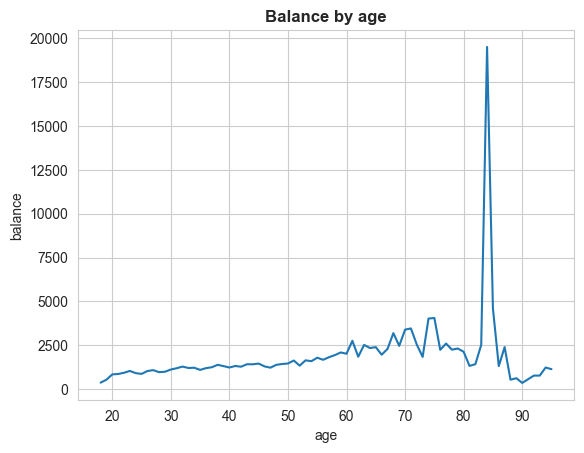

In [55]:
fig.set_size_inches(10,5)
plt.title('Balance by age',weight='bold')
plt.xlabel('age')
plt.ylabel('balance') 

plt.plot(df.groupby('age').mean()['balance'])

- Over the age of 60, Customers tend to have a bit higher balance, mostly around 5,000 euros. 


- This is due to the fact that most people retire after 60 and no longer have a reliable income source.



- Balance highly varied across age

In [56]:
# df.groupby('age').mean()['balance'].to_frame().sort_values(by='age',ascending=False)

# Balance & Job

Text(0.5, 1.0, 'Distribution of balace by Job')

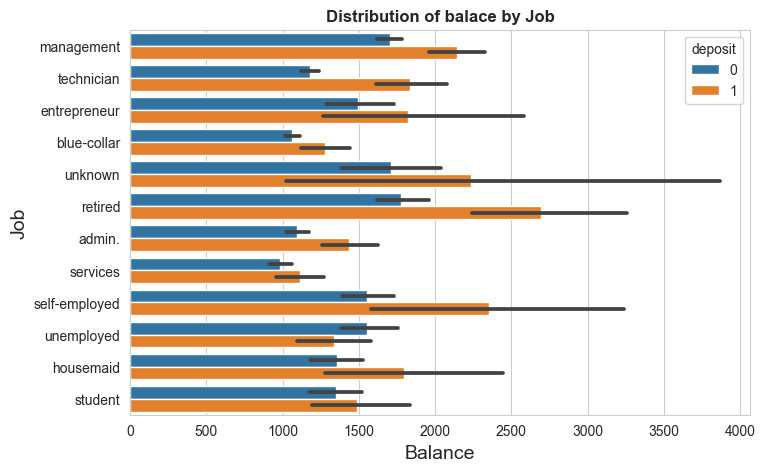

In [57]:
plt.figure(figsize=[8,5])

sns.barplot(data=df,y='job',x='balance',hue='deposit')

plt.xlabel('Balance',fontsize=14)
plt.ylabel('Job',fontsize=14)
plt.title('Distribution of balace by Job',weight='bold')

In [58]:
df.groupby(['job'])['balance'].mean().to_frame().sort_values(by='balance',ascending=False).T

job,retired,unknown,management,self-employed,unemployed,entrepreneur,housemaid,student,technician,admin.,blue-collar,services
balance,1984.215106,1772.357639,1763.616832,1647.970868,1521.745971,1521.470074,1392.395161,1388.060768,1252.632092,1135.838909,1078.826654,997.088108


- According to the graph, **Retired customers** have the **highest balance** value whereas the lowest value is occupied by those who do services.


- It is significant that people who holds **Management** position are **higher earners**, while administrators, blue-collar workers and services staff generally have low income.

<Axes: xlabel='balance', ylabel='job'>

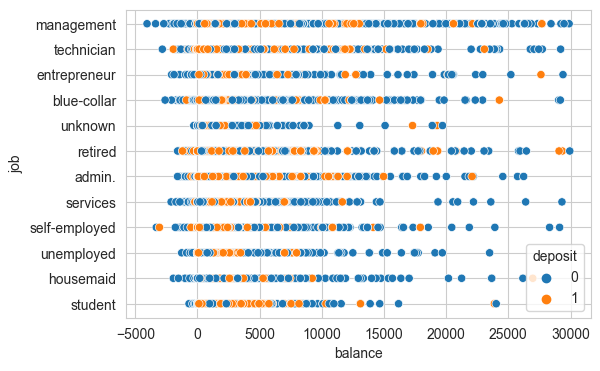

In [59]:
plt.figure(figsize=[6,4])
sns.scatterplot(data=df, y='job', x= df['balance'].loc[(df['balance']>=-5000)&(df['balance']<=30000)], hue='deposit')

## Balance & Education

Text(0.5, 1.0, 'Distribution of Education by Balance')

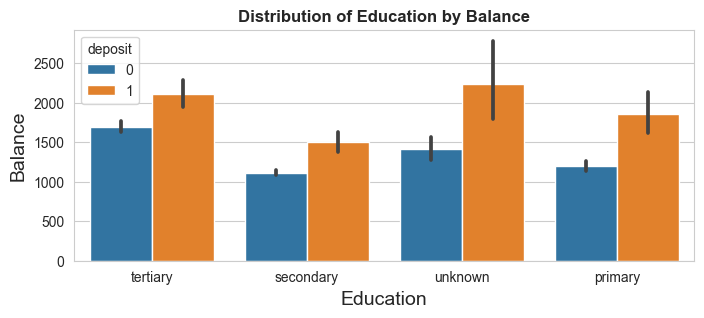

In [60]:
plt.figure(figsize=[8,3])
sns.set_style('whitegrid')
sns.barplot(data=df,y='balance',x='education',hue='deposit')


plt.xlabel('Education',fontsize=14)
plt.ylabel('Balance',fontsize=14)
plt.title('Distribution of Education by Balance',weight='bold')

In [61]:
Ratio('education')

,Nr of Client,DeptSum,Ratio
education,,,
tertiary,13301,1996,0.150064
unknown,1857,252,0.135703
secondary,23202,2450,0.105594
primary,6851,591,0.086265


- Apart from unknown group, which is not clear from dataset why it's called unknown, The Higher Education the higher balance 


- Cutomers with secondary levels are the highest proportion; however, tertiary level has the highest deposit customer percentage 

# Is there any correlation between subsribtion rate and balance?

- Retired customers have the highest balance value whereas the lowest value is occupied by those who do services.


- It is significant that people who holds Management position are higher earners, while administrators, blue-collar workers and services staff generally have low income.

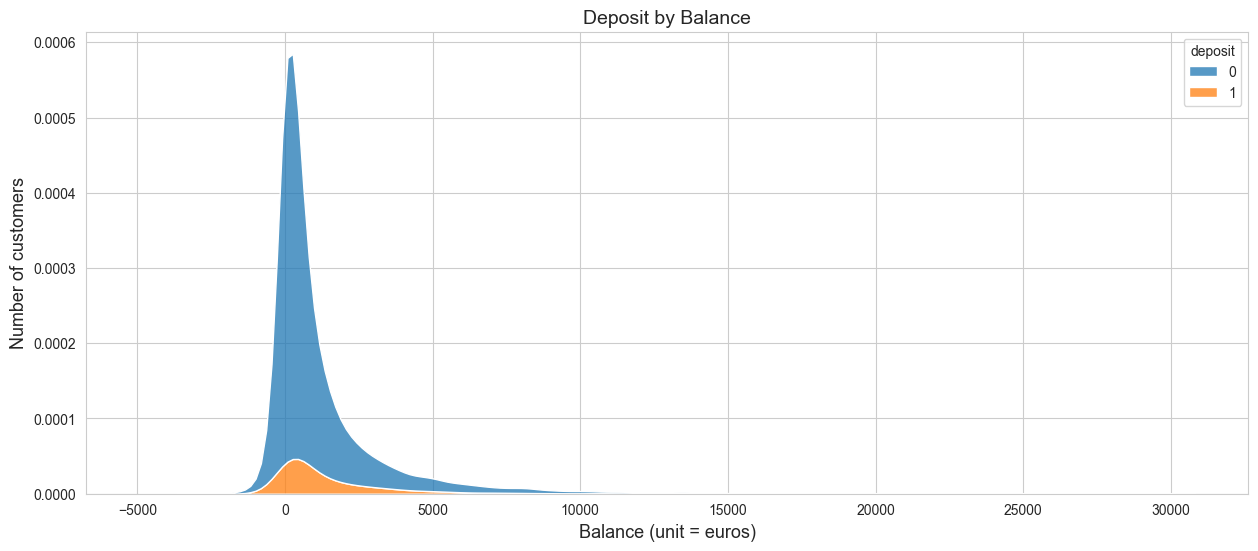

In [62]:
plt.figure(figsize=(15,6))
bal_dep = sns.kdeplot(x = df['balance'].loc[(df['balance']<=30000)&(df['balance']>=-5000)], hue = df['deposit'], multiple="stack")
bal_dep.set_ylabel('Number of customers', fontsize = 13)
bal_dep.set_xlabel('Balance (unit = euros)', fontsize = 13)
bal_dep.set_title('Deposit by Balance', fontsize = 14)
plt.show()

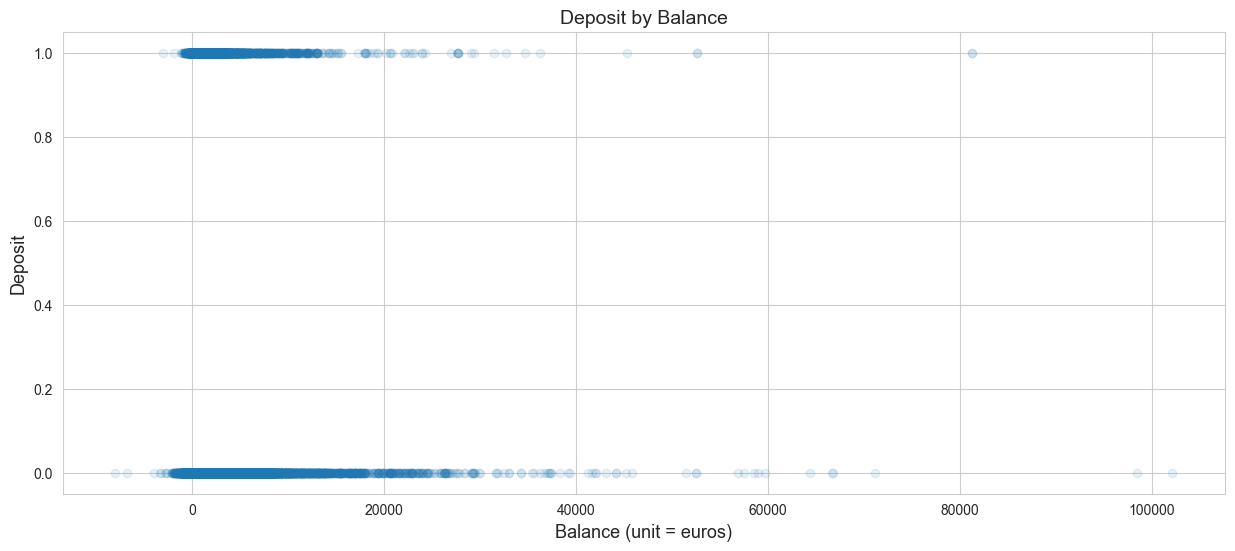

In [63]:
plt.figure(figsize=(15,6))
plt.scatter(df['balance'], df['deposit'], alpha=0.1)
plt.xlabel('Balance (unit = euros)', fontsize = 13)
plt.ylabel('Deposit', fontsize = 13)
plt.title('Deposit by Balance', fontsize = 14)
plt.show()


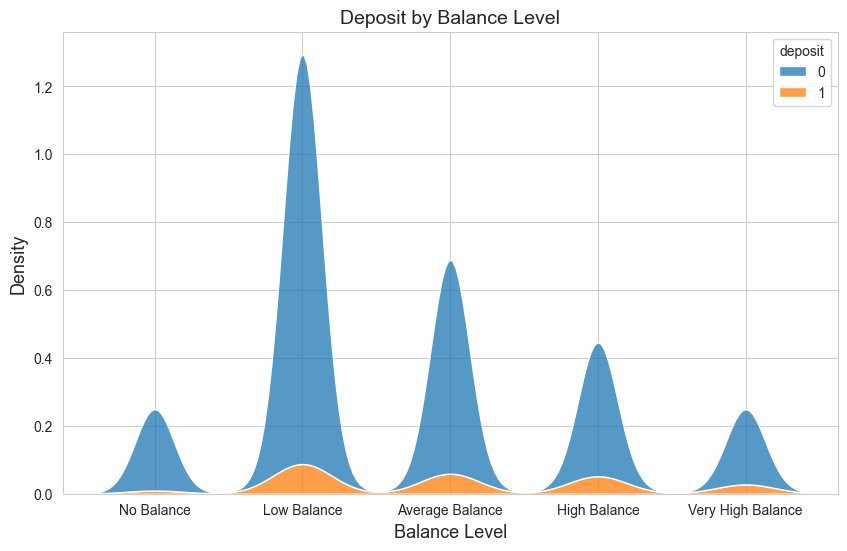

In [64]:
def Balance_level(df):
    if df['balance'] < 0:
        return 'No Balance'
    elif 0 <= df['balance'] < 500:
        return 'Low Balance'
    elif 500 <= df['balance'] < 1500:
        return 'Average Balance'
    elif 1500 <= df['balance'] < 4000:
        return 'High Balance'
    else:
        return 'Very High Balance'

df['Balance_level'] = df.apply(Balance_level, axis=1)

# Convert the Balance_level variable into a categorical variable with numerical codes
df['Balance_level'] = pd.Categorical(df['Balance_level'], categories=['No Balance', 'Low Balance', 'Average Balance', 'High Balance', 'Very High Balance'], ordered=True)
df['Balance_level_code'] = df['Balance_level'].cat.codes

plt.figure(figsize=(10, 6))
sns.kdeplot(x=df['Balance_level_code'], hue=df['deposit'], multiple="stack")
plt.ylabel('Density', fontsize=13)
plt.xlabel('Balance Level', fontsize=13)
plt.title('Deposit by Balance Level', fontsize=14)
plt.xticks(range(5), ['No Balance', 'Low Balance', 'Average Balance', 'High Balance', 'Very High Balance'])
#plt.show()
plt.savefig('balance.png',bbox_inches='tight')


- The plot shows the density distribution of deposit behavior based on balance level.



- Customers with "High Balance" and "Very High Balance" have the highest density of making a deposit.



- Customers with "No Balance" have the highest density of not making a deposit.



- Customers with "Low Balance" have the lowest density of making a deposit.



- There is a positive correlation between a customer's balance level and their likelihood of making a deposit.
    However, this relationship is not deterministic, as there are still exceptions to this trend.

In [65]:
Ratio('Balance_level')

,Nr of Client,DeptSum,Ratio
Balance_level,,,
High Balance,7002,1160,0.165667
Very High Balance,3899,618,0.158502
Average Balance,10673,1329,0.124520
Low Balance,19871,1972,0.099240
No Balance,3766,210,0.055762


-  target customers with high balance



-  To identify the trend more easily, customers are categorized into **five** groups based on their levels of balance:
-  No Balance, Low Balance,Average Balance, High Balance,Very High Balance



- it is expected that there is a positive correlation between customers’ balance levels and subscription rate. customers with negative balances only returned a subscription rate of 0.05 % while customers with average or high balances had significantly higher subscription rates, nearly 16%.



- However, in this campaign, more than 50% of clients contacted only have a low balance level.


- In the future, the bank should shift its marketing focus to high-balance customers to secure more term deposits.

## Day

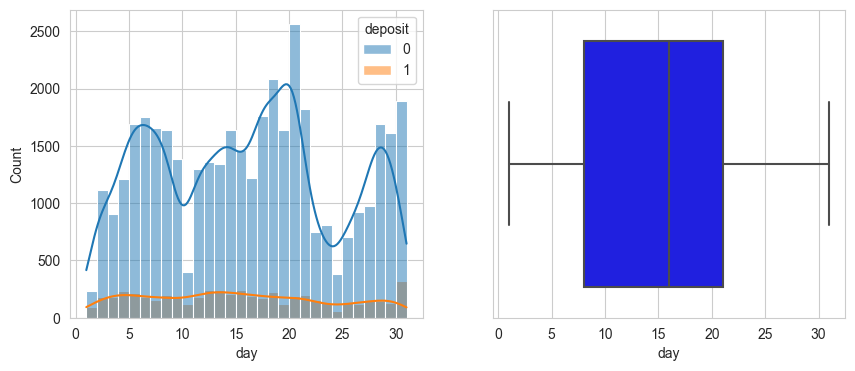

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,4)
sns.histplot(x='day', data=df, hue = 'deposit', bins=30, ax=ax[0],kde = True, color ='y')
sns.boxplot(x='day',data=df, ax=ax[1],color ='b')

plt.xlabel('day')
plt.show()

- we will drop this feature as it's not add any information

# How the distribution of Duration (last contact duration, in seconds) can impact the subsribing ?

<Axes: xlabel='duration', ylabel='Count'>

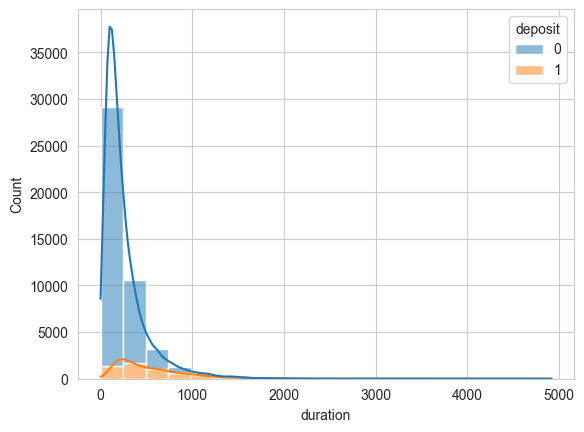

In [67]:
sns.histplot(data=df,x='duration',kde=True, bins=20,hue='deposit',multiple='stack')

- The left-skewed plot indicates that most calls are relatively short. 


- Also, there is a large number of outliers, which need to take a log.

## Scale Transform the Duration

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


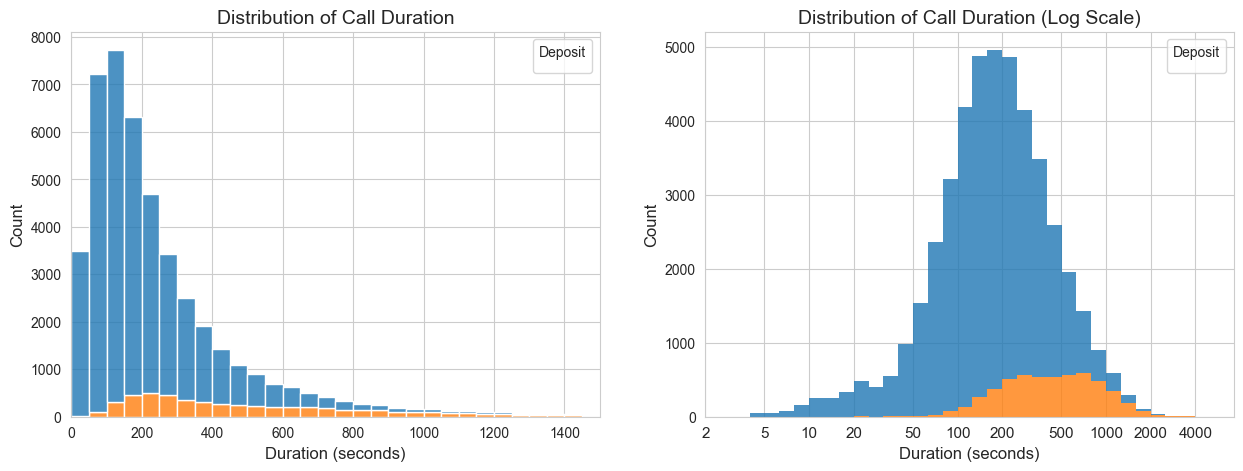

In [68]:
plt.figure(figsize=(15, 5))

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bins = np.arange(0, 1500, 50)
sns.histplot(data=df, x='duration', bins=bins, hue='deposit', multiple='stack', alpha=0.8)
plt.xlim(0, 1500)
plt.xlabel('Duration (seconds)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Call Duration', fontsize=14)
plt.legend(title='Deposit', loc='upper right', fontsize=11)

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
binsize = 0.1
bin_edges = 10 ** np.arange(0.5, np.log10(df['duration'].max())+binsize,binsize) # direct data transform
sns.histplot(data=df, x='duration', bins=bin_edges, hue='deposit', multiple='stack', alpha=0.8)
plt.xscale('log')
tick_locs = [2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 4000]
tick_labels = [str(x) for x in tick_locs]
plt.xticks(tick_locs, tick_labels, fontsize=11)
plt.xlabel('Duration (seconds)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Call Duration (Log Scale)', fontsize=14)
plt.legend(title='Deposit', loc='upper right', fontsize=11)

#plt.tight_layout()
#plt.show()
plt.savefig('Duration.png',bbox_inches='tight')

- The distribution is still heavily skewed until 400 seconds.


- To analyze it easier I take the **log scale** to the data.duration to get a normal distribution


- The **majority** of the call duration lies in the range of 50 to 900 secs.

- this feature highly affects the output target (e.g., if duration=0, then deposit='no'). 


- the duration is not known before a call is performed. Also, after the end of the call, y(deposit) is known. 


- Thus, this input should only be included for benchmark purposes and discarded for the modeling section.

<Figure size 800x300 with 0 Axes>

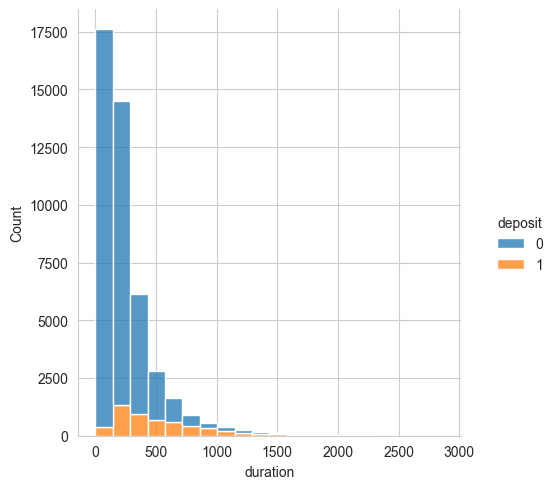

In [69]:
# plot without outlier
fig = plt.figure(figsize=[4,2])
fig.set_size_inches(8,3)
sns.displot(data=df, x=df['duration'].loc[df['duration']<=3000], hue='deposit', multiple='stack',bins=20)
plt.show()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit,age_group,Balance_level,Balance_level_code,call_range
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,0,Mid-age Adults,High Balance,3,low
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,0,Mid-age Adults,Low Balance,1,low
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,0,Young Adults,Low Balance,1,low
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,0,Mid-age Adults,High Balance,3,low
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,0,Young Adults,Low Balance,1,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,3,-1,0,unknown,1,Mid-age Adults,Average Balance,2,low
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,2,-1,0,unknown,1,Older,High Balance,3,low
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,5,184,3,success,1,Older,Very High Balance,4,medium
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,4,-1,0,unknown,0,Mid-age Adults,Average Balance,2,low


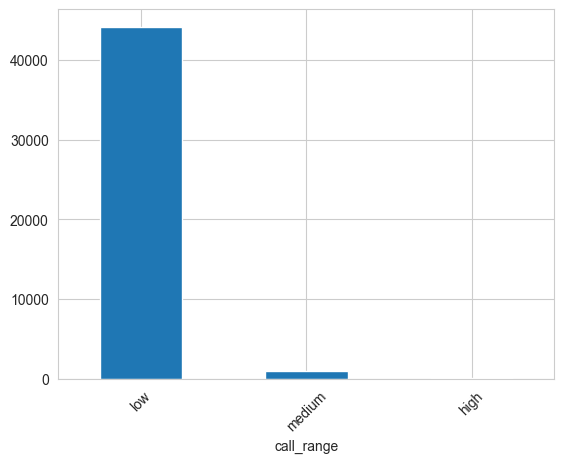

In [70]:
#df['call_range'] = pd.cut(df.duration, [0,1000,2000,3000, 4000, 5000], include_lowest=True, labels = [0,1,2,3,4])
bins= [0,1000,2000,3000]
labels = ['low','medium','high']
df['call_range'] = pd.cut(df.duration, bins=bins, labels =labels,include_lowest=True)
df.groupby('call_range').call_range.count().plot(kind='bar',rot=45)  
df.drop(['duration'], axis = 1)

- If the customer’s call duration is less than a minute, it is very obvious that there is no chance a customer will agree to place deposit.

# Duration & Balance and getting deposit

Text(0.5, 1.0, 'Relation Between duration and balance')

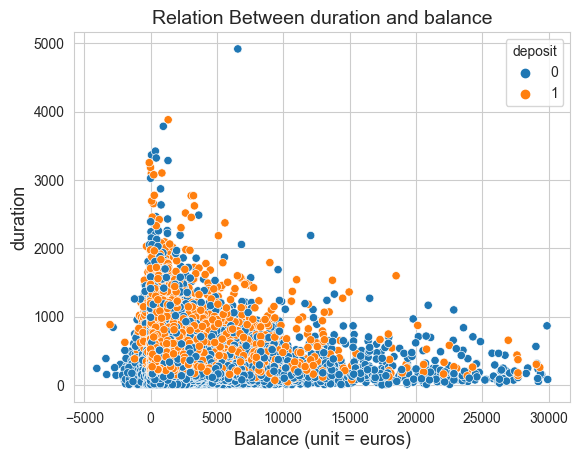

In [71]:
sns.scatterplot(data=df, y='duration', x= df['balance'].loc[(df['balance']>=-5000)&(df['balance']<=30000)], hue='deposit')

plt.ylabel('duration', fontsize = 13)
plt.xlabel('Balance (unit = euros)', fontsize = 13)
plt.title('Relation Between duration and balance', fontsize = 14)

- There is a tendency that longer the duration is, higher probability customers decide to subscribe a deposit, except for duration of over 3000, which seems to be outliers.

# Campaign

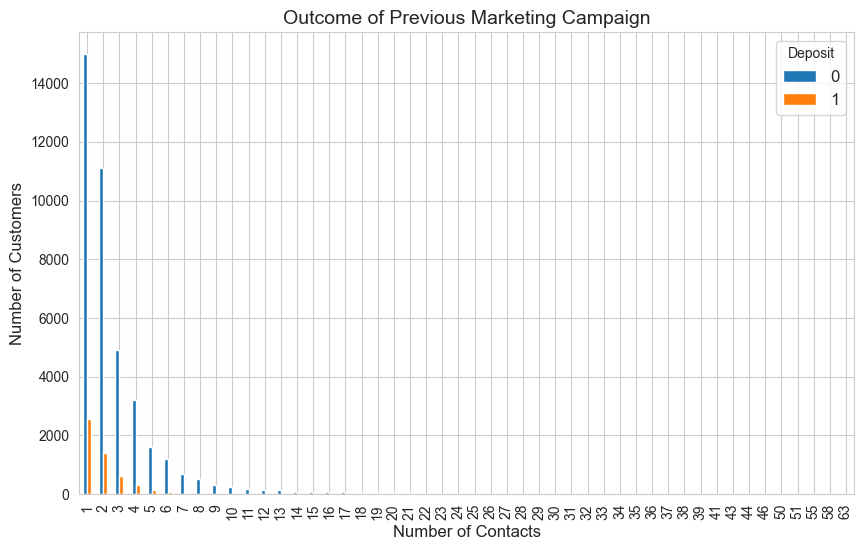

In [72]:
campaign_deposit = df.groupby(['campaign', 'deposit']).size().unstack() # create a pivot table
campaign_deposit.plot(kind='bar', figsize=(10, 6)) # plot the grouped bar chart
plt.title('Outcome of Previous Marketing Campaign', fontsize=14)
plt.xlabel('Number of Contacts', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Deposit', fontsize=12)
plt.show()


- 'campaign' indicates the number of contacts performed for each client during this campaign.

- About half of the customers have been contacted by the bank for the second time.


- while 25% was first introduced to the term deposit.


- Most clients have been reached by the bank for one to three times.


- A few clients have been contacted by as high as 63 times, which is not normal.

# Relationship between campain and duration

<Axes: xlabel='campaign', ylabel='duration'>

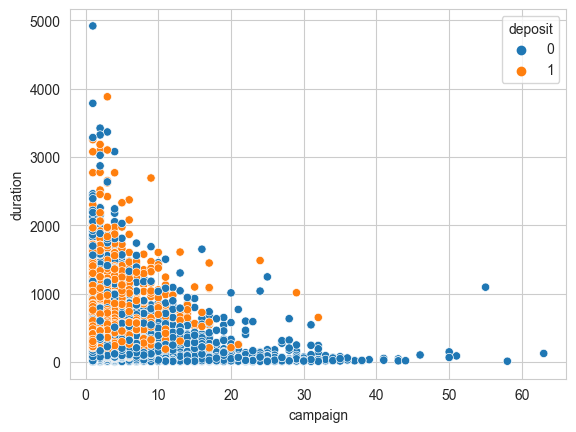

In [73]:
sns.scatterplot(x='campaign',y='duration',data=df ,hue='deposit')

- In a nutshell, **more contacted** in this campaign leads to **less subscribe**


- Most “yes” customers were approached by less than 10 times, customers are more likely to reject the term deposit unless the duration is still high. 



- Based on above graph, customer who subscribed to term deposit chances are very few when the number of contacts performed is more than **20- 25**.



- Therefore, It's better to not calling more than five-ten times as the chance of getting deposit decreased.

In [74]:
# binning the campaign
bins = [0,1,5,10,30,50,63]
labels =['1','2-5','6-10','11-30','31-50','51+']
df['binned_campaign'] = pd.cut(df['campaign'], bins=bins, labels=labels, include_lowest=True)
Ratio('binned_campaign')

,Nr of Client,DeptSum,Ratio
binned_campaign,,,
1,17544,2561,0.145976
2-5,23312,2475,0.106168
6-10,3159,206,0.065211
11-30,1137,46,0.040457
31-50,55,1,0.018182
51+,4,0,0.000000


- Less contact is increase the ratio of deposit

# Pdays

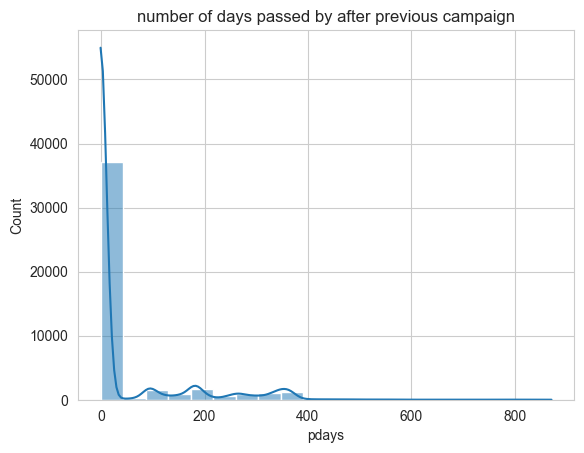

In [75]:
#  number of days that passed by after the client was last contacted from a previous campaign
fig.set_size_inches(2,2)
sns.histplot(data=df, x='pdays', kde = True, legend=True, bins=20)
plt.title('number of days passed by after previous campaign')
plt.xlabel('pdays')
plt.show()

In [76]:
pd.cut(df['pdays'], bins=4).value_counts(normalize=True)

(-1.872, 217.0]    0.916923
(217.0, 435.0]     0.078963
(435.0, 653.0]     0.003141
(653.0, 871.0]     0.000973
Name: pdays, dtype: float64

In [77]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

<Axes: xlabel='pdays_range'>

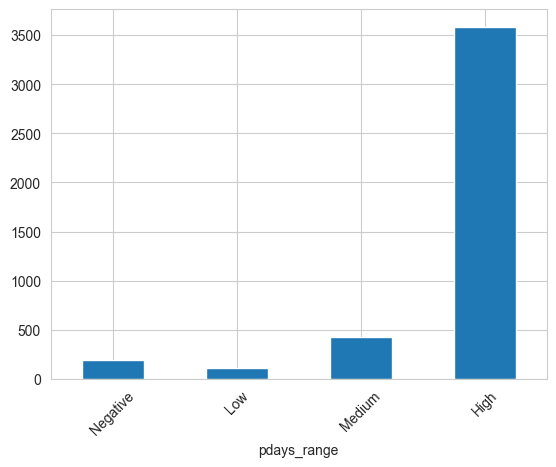

In [78]:
# divide pdays into 4 groups
bins = [-1, 30, 60, 90,200]
labels = ['Negative', 'Low', 'Medium','High']
df['pdays_range'] = pd.cut(df['pdays'], bins=bins, labels=labels, include_lowest=False)
df.groupby('pdays_range').pdays_range.count().plot(kind='bar',rot=45) 
# set include_lowest = False
# by doing so, the -1 values would not contain in any group
# it will be encoded as NaN

In [79]:
# those -1 values considered as nan
set(df.pdays_range)

{'High', 'Low', 'Medium', 'Negative', nan}

In [80]:
# change the dtype as object
df['pdays_range'] = df['pdays_range'].astype('O')

# fillna as Not contacted
df['pdays_range'].fillna('First time Customers', inplace=True)

In [81]:
df['pdays_range'].value_counts(normalize=True)

First time Customers    0.904824
High                    0.079295
Medium                  0.009378
Negative                0.004158
Low                     0.002345
Name: pdays_range, dtype: float64

In [82]:
set(df.pdays_range)

{'First time Customers', 'High', 'Low', 'Medium', 'Negative'}

In [83]:
# drop pdays (original variable)
#data.drop('pdays', axis=1, inplace=True)

- There are a lot of Customers (value = -1) who was not previous contacted.


- very few values which have more than 16 days.


- has outlier till 871 days, we need to remove more than 40 dasy


- The **lower the pdays**, the **better the memory of the last call** and hence the better chances of a sale.


In [84]:
Ratio('pdays_range')

,Nr of Client,DeptSum,Ratio
pdays_range,,,
Medium,424,183,0.431604
Low,106,40,0.377358
High,3585,1116,0.311297
Negative,188,28,0.148936
First time Customers,40908,3922,0.095874


- After 60-90 days from the last contact of previous campaign, customers tend to accept the offer to subscribe when they are contacted again in the current campaign, probably they are using other services in the bank. 


- If customers are never contacted, they will be likely to reject the subscription.

# previous

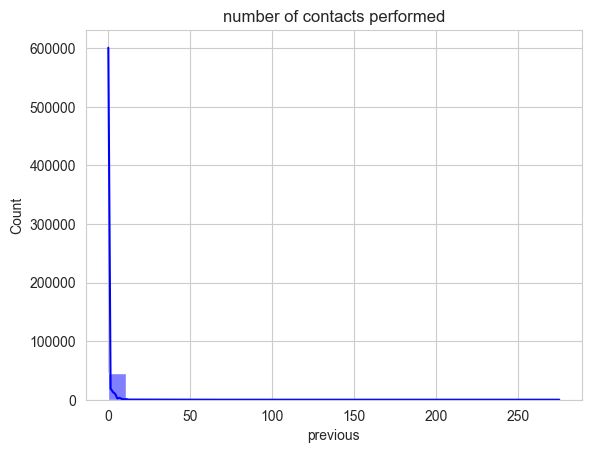

In [85]:
# number of contacts performed before this campaign and for this client 
sns.histplot(data=df, x='previous', kde = True, legend=True, bins=25, color ='b')
plt.title('number of contacts performed')
plt.xlabel('previous')
plt.show()

In [86]:
df.previous.describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [87]:
#df.previous.value_counts()

In [88]:
bins = [-1,0,1,5,20,50,100,275]
labels =['0','1','2-5','6-20','21-50','51-100','101-']
df['binned_previous'] = pd.cut(df['previous'], bins,labels=labels)
Ratio('binned_previous')

,Nr of Client,DeptSum,Ratio
binned_previous,,,
51-100,3,2,0.666667
6-20,1009,272,0.269574
2-5,4421,1042,0.235693
1,2772,583,0.210317
21-50,51,6,0.117647
0,36954,3384,0.091573
101-,1,0,0.000000


- Customers who got about 51-100 contacts from previous campaigns tend to agree with the subscription, but the number of customer is only 3, while others with no contacts tend to refuse the deposit; About more than 100 contacts, this values could be outliers

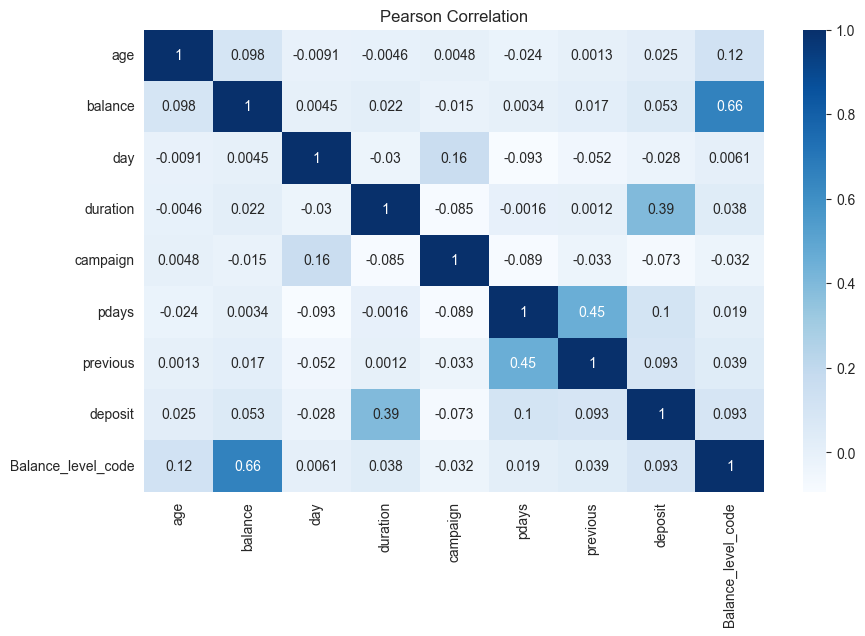

In [90]:
#visualize the correlation

plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.title("Pearson Correlation")
plt.show()

# EDA categorical Outcome

- Students and retirees are more likely to open term deposits.


- Singles open more accounts than divorced or married clients.


- 65% of customers who agreed to a previous campaign also agreed to a new campaign.


- Probability of a customer agreeing to open an account decreases with each call, with almost zero probability after 26 calls and less than 3% probability after 11 calls.


- Contacting through cellular leads to slightly more deposits, but not significantly different from telephone 


- The bank should focus on high-balance customers to secure more term deposits.


- Increased contact during the campaign leads to lower subscription rates.


- Customers are more likely to reject term deposits unless the duration is still high and most "yes" customers were approached less than 10 times.


- Lower "pdays" (days since last contact) lead to better memory and higher chances of a sale.


- The bank contacted most customers between May and August, with the highest contact rate in May, and lower rates in March, January, and December.


- Subscription rates showed a different trend, with the highest rate in March and rates over 40% in September, October, and December.


# EDA Numerical Outcome

**Regarding the Age**

- target the **youngest** and the **oldest** instead of the middle-aged


- Term deposits, as the least risky investment tool, are preferable to the eldest.


- Results show that the bank focused its marketing efforts on the **middle-aged group**, which returned **lower subscription rates** than the younger and older groups. Thus, to make the marketing campaign more effective, the bank should target younger and older clients in the future.


**Regarding the balance** :

- The average yearly balance of customers given is diverse and quite low, which is mostly around €1400 per year.


- The distribution of balance has a huge standard deviation relative to the mean, suggesting large variabilities in customers' balance levels.

- Over the age of 60, Customers tend to have a bit higher balance, mostly around 5,000 euros.


- This is due to the fact that most people retire after 60 and no longer have a reliable income source.


- Balance highly varied across age

**Regarding the duration**

- The left-skewed plot indicates that most calls are relatively short. Also, there are many outliers ranging from 10 to 40 minutes, which are worth further study.The distribution is still heavily skewed until 400 seconds.



- To analyze it easier, I take the log scale to the data. Duration to get a normal distributionMost of the call duration lies in the range of 50 to 800 secs.- If the customer’s call duration is less than a minute, it is obvious that there is no chance a customer will agree to place a deposit.



- There is a tendency that the longer the duration is, the higher the probability customers decide to subscribe to a deposit, except for a duration of over 3000, which seems to be outliers.



- About half of the customers have been contacted by the bank for the second time.while 25% was first introduced to the term deposit.Most clients have been reached by the bank for one to three times.



- A few clients have been contacted by as high as 63 times, which is not normal.Customers who got about 51-100 contacts from previous campaigns tend to agree with the subscription, but the number of customers is only 3, while others with no contacts tend to refuse the deposit; About more than 100 contacts, these values could be outliers

In [91]:
df.to_csv('bank_data_after_eda.csv')